In [41]:
#Import necessary libraries
import pandas as pd
import os
import requests
import numpy as np
import requests
from pprint import pprint
import json
import gmaps
import matplotlib.pyplot as plt
import numpy as np

# Import API key
from api_keys import g_key

import datetime
from scipy.stats import linregress

In [42]:
# import clean_country_data.csv from file
filename = os.path.join("clean_data_files","clean_data_by_country.csv")
country_data  = pd.read_csv(filename)
del country_data["Unnamed: 0"]
del country_data["JH Confirmed"]
del country_data["JH Recovered"]
country_data.describe()

,2018 GDP (Trillions USD),JH Deaths,Area (mi2),Population,Population Density (mi2),Lat,Lng
count,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000
mean,485.248555,6483.676301,2.866351e+05,42.718178,808.881156,20.100222,16.440287
std,1968.351140,24266.639495,7.818937e+05,152.880602,4048.822139,24.484442,57.841837
min,0.000000,0.000000,7.800000e-01,0.034641,5.400000,-41.829454,-112.494334
25%,13.000000,46.000000,1.108200e+04,2.413643,93.000000,4.516800,-8.396407
50%,42.000000,224.000000,5.525100e+04,9.397800,211.000000,18.155195,19.394358
75%,245.000000,1654.000000,2.100260e+05,30.280811,520.000000,41.461831,43.744674
max,20500.000000,223264.000000,6.612093e+06,1404.484040,49107.000000,68.795828,171.462581


In [43]:
# Formatting and renaming
country_data["JH Deaths/K"] = country_data["JH Deaths"]/1000
country_data["% Total Deaths"] = country_data["JH Deaths"]/country_data["JH Deaths"].sum()
country_data.rename(columns={"Population": "Population (M)"}, inplace=True)
country_data.dtypes

Country Name                 object
Country Code                 object
2018 GDP (Trillions USD)    float64
JH Deaths                   float64
Area (mi2)                  float64
Population (M)              float64
Population Density (mi2)    float64
Lat                         float64
Lng                         float64
JH Deaths/K                 float64
% Total Deaths              float64
dtype: object

In [48]:
#Create gmap visualization of COVID deaths by country
# access maps with unique API key
gmaps.configure(api_key=g_key)
locations = country_data[["Lat","Lng"]]
JH_deaths = country_data["JH Deaths"]
GDP = country_data["2018 GDP (Trillions USD)"]
# create intial gmap figure
fig = gmaps.figure()
# add heatmap layer
death_layer = gmaps.heatmap_layer(locations, weights=JH_deaths, dissipating=False, max_intensity=1000, point_radius=0.9)
GDP_layer = gmaps.heatmap_layer(locations, weights=GDP, dissipating=True, max_intensity=1000, point_radius=15)
# add heatmap layer to figure
fig.add_layer(death_layer)
fig.add_layer(GDP_layer)
# Display the figure
fig

Figure(layout=FigureLayout(height='420px'))

r = 0.36328672479379637


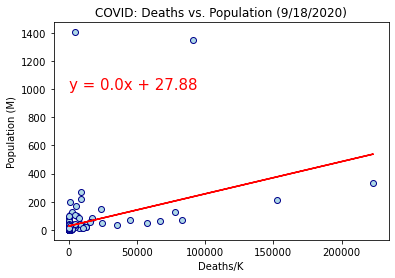

In [36]:
# Deaths vs Population
x_data = country_data["JH Deaths"]
y_data = country_data["Population (M)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"COVID: Deaths vs. Population ({today.month}/{today.day}/{today.year})")
plt.xlabel("Deaths/K")
plt.ylabel("Population (M)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 1000), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
# output_path_fig5 = os.path.join("..","output_data","fig5.png")
# plt.savefig(output_path_fig5)

r = -0.03213604573554339


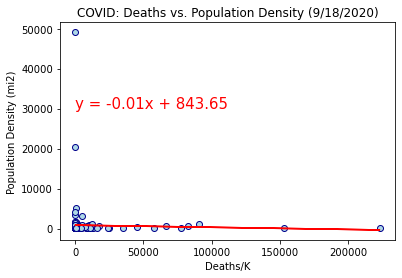

In [39]:
# Deaths vs Population Density
x_data = country_data["JH Deaths"]
y_data = country_data["Population Density (mi2)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"COVID: Deaths vs. Population Density ({today.month}/{today.day}/{today.year})")
plt.xlabel("Deaths/K")
plt.ylabel("Population Density (mi2)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 30000), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
# output_path_fig5 = os.path.join("..","output_data","fig5.png")
# plt.savefig(output_path_fig5)

r = 0.6746545168133808


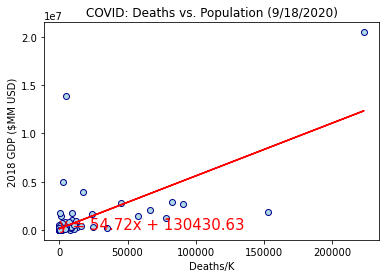

In [40]:
# Deaths vs Population Density
x_data = country_data["JH Deaths"]
y_data = country_data["2018 GDP ($MM USD)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"COVID: Deaths vs. Population ({today.month}/{today.day}/{today.year})")
plt.xlabel("Deaths/K")
plt.ylabel("2018 GDP ($MM USD)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 30000), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
# output_path_fig5 = os.path.join("..","output_data","fig5.png")
# plt.savefig(output_path_fig5)